In [ ]:
! python main.py --dataset cifar --model resnet_fixup --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --depth 18  --weight_decay 1e-4 --run_from_scratch 1 --client_num 20 --client_opt_name sgd --client_epoch 1 --client_lr 0.01 --client_momentum 0.0  --sketch_size -1 --server_opt sgd --non_iid_alpha 0.8
! python main.py --dataset cifar --model resnet_fixup --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --depth 18  --weight_decay 1e-4 --run_from_scratch 1 --client_num 20 --client_opt_name sgd --client_epoch 1 --client_lr 0.01 --client_momentum 0.0  --sketch_size -1 --server_opt clip_sgd --non_iid_alpha 0.8 --clip_tau 0.5

! python main.py --dataset cifar --model resnet_fixup --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --depth 18  --weight_decay 1e-4 --run_from_scratch 1 --client_num 80 --client_opt_name sgd --client_epoch 1 --client_lr 0.1 --client_momentum 0.0  --sketch_size 400000 --server_opt clip_sgd --non_iid_alpha 0.8 --clip_tau 0.4
! python main.py --dataset cifar --model resnet_fixup --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --depth 18  --weight_decay 1e-4 --run_from_scratch 1 --client_num 80 --client_opt_name sgd --client_epoch 1 --client_lr 0.1 --client_momentum 0.0  --sketch_size -1 --server_opt clip_sgd --non_iid_alpha 0.8 --clip_tau 0.4

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.4/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_400000/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.4/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.4/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_40000/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


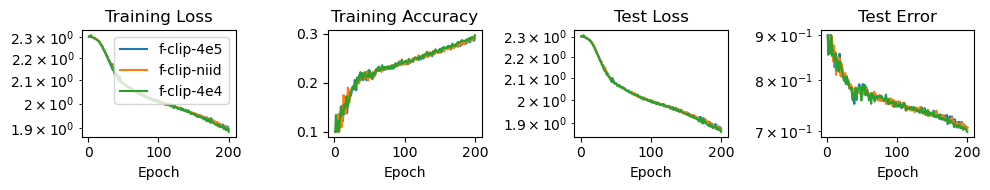

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.4/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


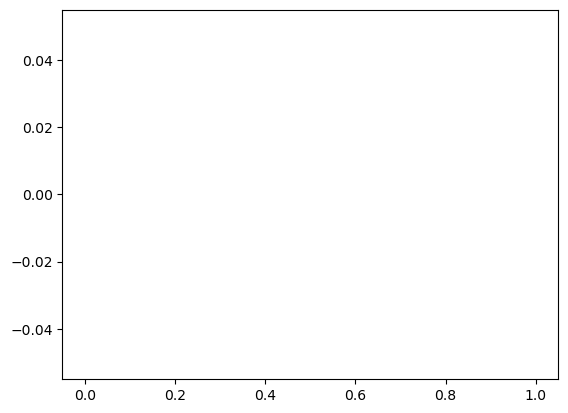

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.4/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


(array([10.,  7., 19., 18., 16.,  4.,  4.,  1.,  0.,  1.]),
 array([0.32975033, 0.35470724, 0.37966415, 0.40462106, 0.42957796,
        0.45453487, 0.47949178, 0.50444869, 0.5294056 , 0.55436251,
        0.57931942]),
 <BarContainer object of 10 artists>)

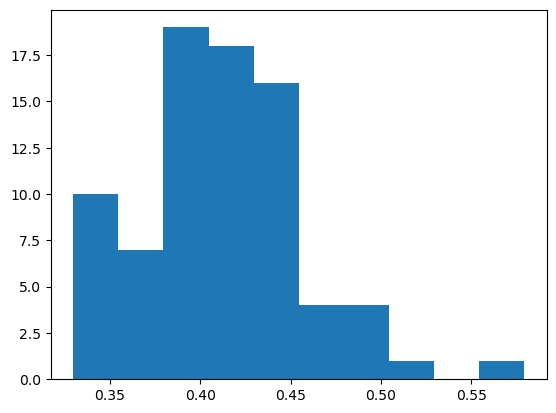

In [71]:
from plot_functions import get_attr, plot_figures_opts_attrs
from main import graphs
import matplotlib.pyplot as plt
import numpy as np

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, smooth, epochs = 1.0, "cifar", 'CrossEntropyLoss', 0.0, 1e-4, 128, 0.1, 200
model_name, depth = "resnet_fixup", 18
client_opt, client_lr, client_momentum, client_num, client_epoch, sketch_size, scheduler, lr_min  ="sgd", 0.1, 0.0, 80, 1, 80000, "cosine", 1e-5
model_params, opt_params = {}, {}
model_params["f-sgd"] = {"depth": depth, "non_iid": 0.8, 'smooth':smooth, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#model_params["f-sgd-niid"] = {"depth": depth, "non_iid": 0.8, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
#opt_params['f-sgd-niid'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-niid"] = {"depth": depth, "non_iid": 0.8, "clip": 0.4, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params["f-clip-niid"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-4e5"] = {"depth": depth, "non_iid": 0.8, "clip": 0.4, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": 400000}
opt_params["f-clip-4e5"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-4e4"] = {"depth": depth, "non_iid": 0.8, "clip": 0.4, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": 40000}
opt_params["f-clip-4e4"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(["f-clip-4e5", "f-clip-niid", "f-clip-4e4"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err"])
#grad_norm = get_attr("f-sgd", model_params, opt_params, "grad_norm")
#plt.hist(np.array(grad_norm)[-1].reshape(-1))
#plt.show()

grad_norm = get_attr("f-clip-niid", model_params, opt_params, "grad_norm")
plt.hist(np.array(grad_norm).reshape(-1))
plt.show()
pseudo_grad_norm = get_attr("f-clip-niid", model_params, opt_params, "pseudo_grad_norm")
plt.hist(np.array(pseudo_grad_norm[-1]).reshape(-1))


In [ ]:
! python main.py --dataset cifar --model resnet_fixup --loss CrossEntropyLoss --opt federated --lr 1.0 --epoch 200 --analysis loss --log_interval 1 --batch_size 128 --momentum 0.0 --depth 18  --weight_decay 1e-4 --run_from_scratch 1 --client_num 80 --client_opt_name sgd --client_epoch 1 --client_lr 0.01 --client_momentum 0.0  --sketch_size -1 --server_opt clip_sgd --non_iid_alpha 0.8 --clip_tau 0.5

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.2/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.2/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_400000/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.2/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_40000/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


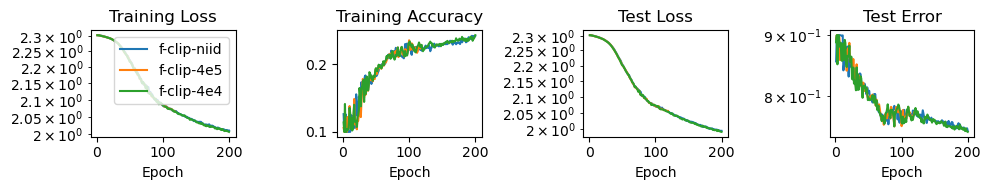

In [68]:
from plot_functions import get_attr, plot_figures_opts_attrs
from main import graphs
import matplotlib.pyplot as plt
import numpy as np

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, smooth, epochs = 1.0, "cifar", 'CrossEntropyLoss', 0.0, 1e-4, 128, 0.1, 200
model_name, depth = "resnet_fixup", 18
client_opt, client_lr, client_momentum, client_num, client_epoch, sketch_size, scheduler, lr_min  ="sgd", 0.1, 0.0, 80, 1, 80000, "cosine", 1e-5
model_params, opt_params = {}, {}
#model_params["f-sgd"] = {"depth": depth, "non_iid": 0.05, 'smooth':smooth, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
#opt_params['f-sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-sgd-niid"] = {"depth": depth, "non_iid": 0.8, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd-niid'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-niid"] = {"depth": depth, "non_iid": 0.8, "clip": 0.2, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params["f-clip-niid"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-4e5"] = {"depth": depth, "non_iid": 0.8, "clip": 0.2, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": 400000}
opt_params["f-clip-4e5"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-4e4"] = {"depth": depth, "non_iid": 0.8, "clip": 0.2, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": 40000}
opt_params["f-clip-4e4"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(["f-clip-niid", "f-clip-4e5", "f-clip-4e4"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err"])

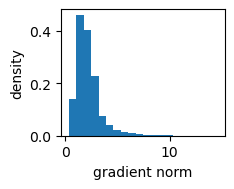

(array([ 4., 10., 14., 25., 14.,  9.,  1.,  1.,  1.,  1.]),
 array([0.31636217, 0.34399756, 0.37163295, 0.39926833, 0.42690372,
        0.45453911, 0.48217449, 0.50980988, 0.53744527, 0.56508065,
        0.59271604]),
 <BarContainer object of 10 artists>)

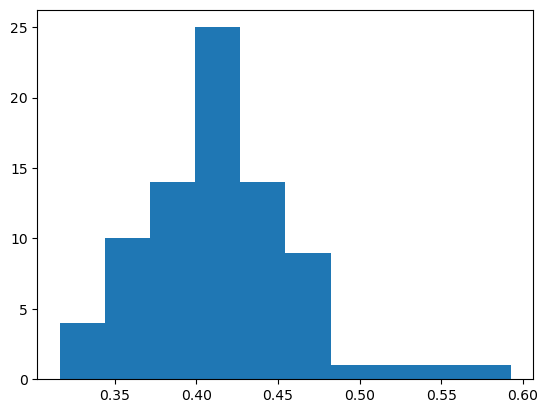

In [2]:
from plot_functions import get_attr, plot_figures_opts_attrs
from main import graphs
import matplotlib.pyplot as plt
import numpy as np

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, smooth, epochs = 1.0, "cifar", 'CrossEntropyLoss', 0.0, 1e-4, 128, 0.1, 200
model_name, depth = "resnet_fixup", 18
client_opt, client_lr, client_momentum, client_num, client_epoch, sketch_size, scheduler, lr_min  ="sgd", 0.1, 0.0, 80, 1, 80000, "cosine", 1e-5
model_params, opt_params = {}, {}
model_params["f-sgd"] = {"depth": depth, "non_iid": 0.05, 'smooth':smooth, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-sgd-niid"] = {"depth": depth, "non_iid": 0.8, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd-niid'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-niid"] = {"depth": depth, "non_iid": 0.8, "clip": 0.5, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params["f-clip-niid"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts_attrs(["f-sgd-niid", "f-clip-niid"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err"])
#grad_norm = get_attr("f-sgd", model_params, opt_params, "grad_norm")
#plt.hist(np.array(grad_norm)[-1].reshape(-1))
#plt.show()
plt.figure(figsize=(2.5,2))
grad_norm = get_attr("f-sgd-niid", model_params, opt_params, "grad_norm")
plt.hist(np.array(grad_norm)[:2400].reshape(-1), bins=20, density=True)
plt.xlabel("gradient norm")
plt.ylabel("density")
plt.tight_layout()
#plt.savefig("../plots/neurips24/heavy_tail.pdf")
plt.show()
pseudo_grad_norm = get_attr("f-sgd-niid", model_params, opt_params, "pseudo_grad_norm")
plt.hist(np.array(pseudo_grad_norm[-2]).reshape(-1))

In [22]:
from scipy.stats import levy_stable
points = 1000
jennys_constant = 8675309
alpha, beta = 1.8, -0.5

#draw = st.levy_stable.rvs(alpha, beta, size=points, random_state=jennys_constant)
#print(levy.fit(draw))

data_points = np.array(grad_norm)[:2400].reshape(-1)
#data_points = levy_stable.rvs(1.8, -0.5, 0.2, 0.8, 500)
alpha, beta, loc, scale = levy_stable.fit(data_points)
pdf_levy = [levy_stable.pdf(x, alpha, beta, loc, scale) for x in np.arange(0,10,0.1)]
plt.plot(np.arange(0,10,0.1), pdf_levy)
#plt.hist(np.array(grad_norm)[:2400].reshape(-1), bins=40, density=True)

: 

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/server_opt_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/clip_0.5/server_opt_clip_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


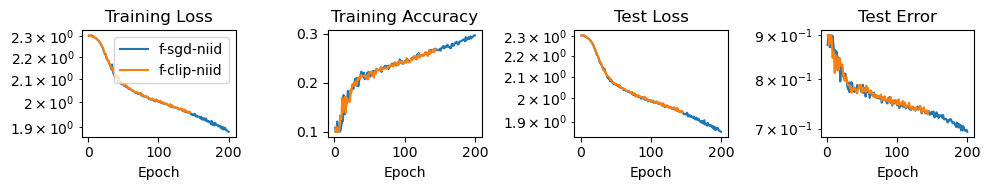

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/server_opt_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


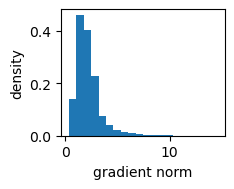

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/server_opt_sgd/client_opt_sgd/client_lr_0.1/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_128/epoch_200/run_0/


(array([ 4., 10., 14., 25., 14.,  9.,  1.,  1.,  1.,  1.]),
 array([0.31636217, 0.34399756, 0.37163295, 0.39926833, 0.42690372,
        0.45453911, 0.48217449, 0.50980988, 0.53744527, 0.56508065,
        0.59271604]),
 <BarContainer object of 10 artists>)

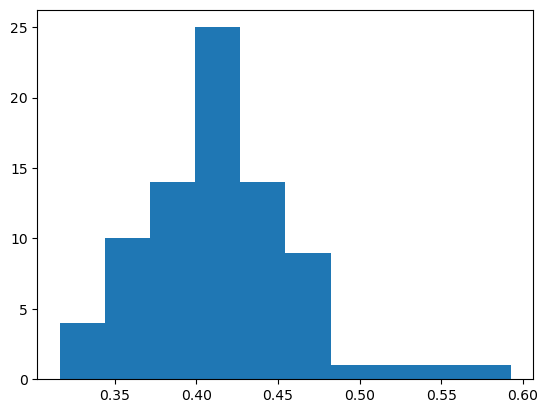

In [91]:
from plot_functions import get_attr, plot_figures_opts_attrs
from main import graphs
import matplotlib.pyplot as plt
import numpy as np

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, smooth, epochs = 1.0, "cifar", 'CrossEntropyLoss', 0.0, 1e-4, 128, 0.1, 200
model_name, depth = "resnet_fixup", 18
client_opt, client_lr, client_momentum, client_num, client_epoch, sketch_size, scheduler, lr_min  ="sgd", 0.1, 0.0, 80, 1, 80000, "cosine", 1e-5
model_params, opt_params = {}, {}
model_params["f-sgd"] = {"depth": depth, "non_iid": 0.05, 'smooth':smooth, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-sgd-niid"] = {"depth": depth, "non_iid": 0.8, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd-niid'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-niid"] = {"depth": depth, "non_iid": 0.8, "clip": 0.5, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params["f-clip-niid"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["f-sgd-niid", "f-clip-niid"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err"])
#grad_norm = get_attr("f-sgd", model_params, opt_params, "grad_norm")
#plt.hist(np.array(grad_norm)[-1].reshape(-1))
#plt.show()
plt.figure(figsize=(2.5,2))
grad_norm = get_attr("f-sgd-niid", model_params, opt_params, "grad_norm")
plt.hist(np.array(grad_norm)[:2400].reshape(-1), bins=20, density=True)
plt.xlabel("gradient norm")
plt.ylabel("density")
plt.tight_layout()
plt.savefig("../plots/neurips24/heavy_tail.pdf")
plt.show()
pseudo_grad_norm = get_attr("f-sgd-niid", model_params, opt_params, "pseudo_grad_norm")
plt.hist(np.array(pseudo_grad_norm[-2]).reshape(-1))


In [76]:
len(grad_norm)

16000

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/server_opt_sgd/client_opt_sgd/client_lr_0.01/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_512/epoch_200/run_0/


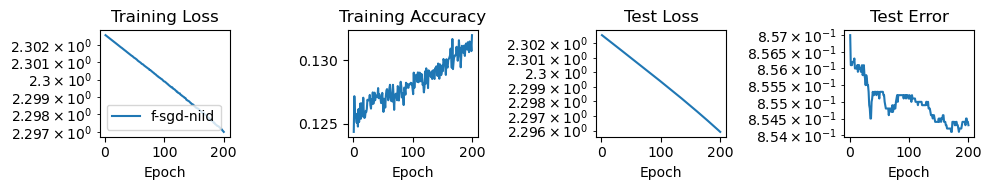

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/server_opt_sgd/client_opt_sgd/client_lr_0.01/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_512/epoch_200/run_0/


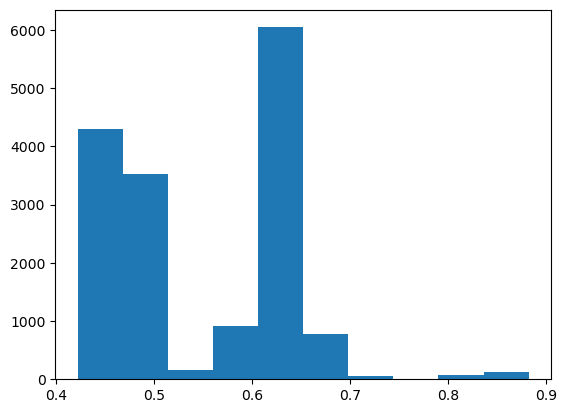

results/cifar/CrossEntropyLoss/federated/resnet_fixup/depth_18/non_iid_0.8/server_opt_sgd/client_opt_sgd/client_lr_0.01/client_momentum_0.0/client_num_80/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.0/wd_0.0001/batch_size_512/epoch_200/run_0/


(array([20., 17.,  3.,  0., 23., 12.,  4.,  0.,  0.,  1.]),
 array([0.004401  , 0.00481444, 0.00522788, 0.00564132, 0.00605476,
        0.00646819, 0.00688163, 0.00729507, 0.00770851, 0.00812195,
        0.00853539]),
 <BarContainer object of 10 artists>)

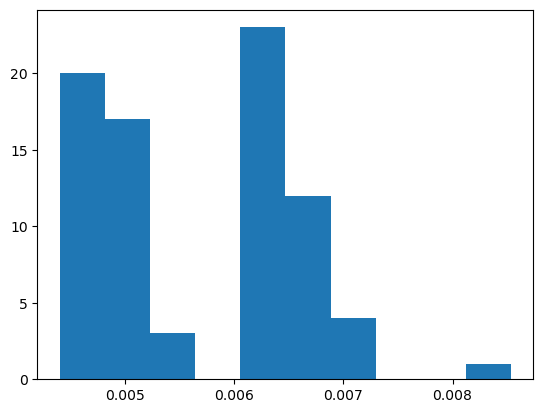

In [1]:
from plot_functions import get_attr, plot_figures_opts_attrs
from main import graphs
import matplotlib.pyplot as plt
import numpy as np

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, smooth, epochs = 1.0, "cifar", 'CrossEntropyLoss', 0.0, 1e-4, 512, 0.1, 200
model_name, depth = "resnet_fixup", 18
client_opt, client_lr, client_momentum, client_num, client_epoch, sketch_size, scheduler, lr_min  ="sgd", 0.01, 0.0, 80, 1, 80000, "cosine", 1e-5
model_params, opt_params = {}, {}
model_params["f-sgd"] = {"depth": depth, "non_iid": 0.05, 'smooth':smooth, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-sgd-niid"] = {"depth": depth, "non_iid": 0.8, 'server_opt': 'sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params['f-sgd-niid'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

model_params["f-clip-niid"] = {"depth": depth, "non_iid": 0.8, "clip": 0.5, 'server_opt': 'clip_sgd', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": -1}
opt_params["f-clip-niid"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'federated', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["f-sgd-niid"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err"])
#grad_norm = get_attr("f-sgd", model_params, opt_params, "grad_norm")
#plt.hist(np.array(grad_norm)[-1].reshape(-1))
#plt.show()
grad_norm = get_attr("f-sgd-niid", model_params, opt_params, "grad_norm")
plt.hist(np.array(grad_norm).reshape(-1))
plt.show()
pseudo_grad_norm = get_attr("f-sgd-niid", model_params, opt_params, "pseudo_grad_norm")
plt.hist(np.array(pseudo_grad_norm[-1]).reshape(-1))

In [28]:
len(grad_norm)

160